<a href="https://colab.research.google.com/github/thanhdat18702/colab_notebook/blob/main/Final_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# DATA OVERVIEW AND PROCESSING


In [ ]:
df = pd.read_csv("/Train (1).csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<ipython-input-26-def261693490>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap=custom_cmap)


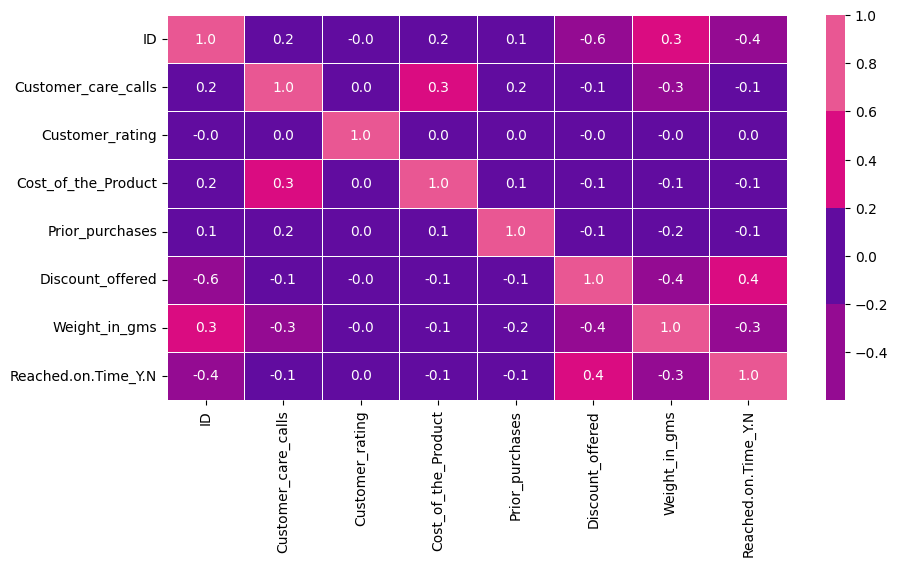

In [ ]:

from matplotlib.colors import ListedColormap
custom_colors = ["#940B92", "#610C9F", "#DA0C81", "#E95793"]
custom_cmap = ListedColormap(custom_colors)
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap=custom_cmap)
plt.show()



In general, the correlation is not strong between Reached.on.Time_Y.N
and other variables.

Insights


1.  Discount Offered have positive correlation with Reached on
Time or Not of 40%
2.   Weight_in_gms have negative correlation with Reached
on Time or Not of 27%
3. Gender of the customers have no correlation with Reached
on Time or Not >> Need to exclude when building
predictive models



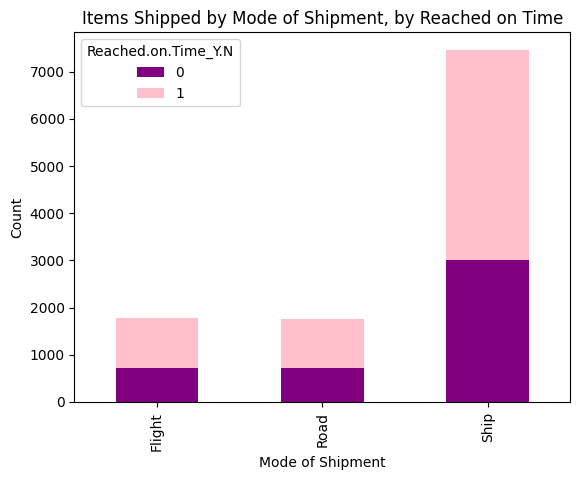

In [ ]:
grouped = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True, color=['Purple', 'Pink'])
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Items Shipped by Mode of Shipment, by Reached on Time')
plt.show()





*   This visualization displays the various methods of shipment that were utilized
for delivering the products.
*   The mode of shipment that was most commonly used to send the products was "Ship", with over 7000 shipments sent through it.
*   Ship mode had a higher percentage of products that reached their destination on time compared to flight and road modes.


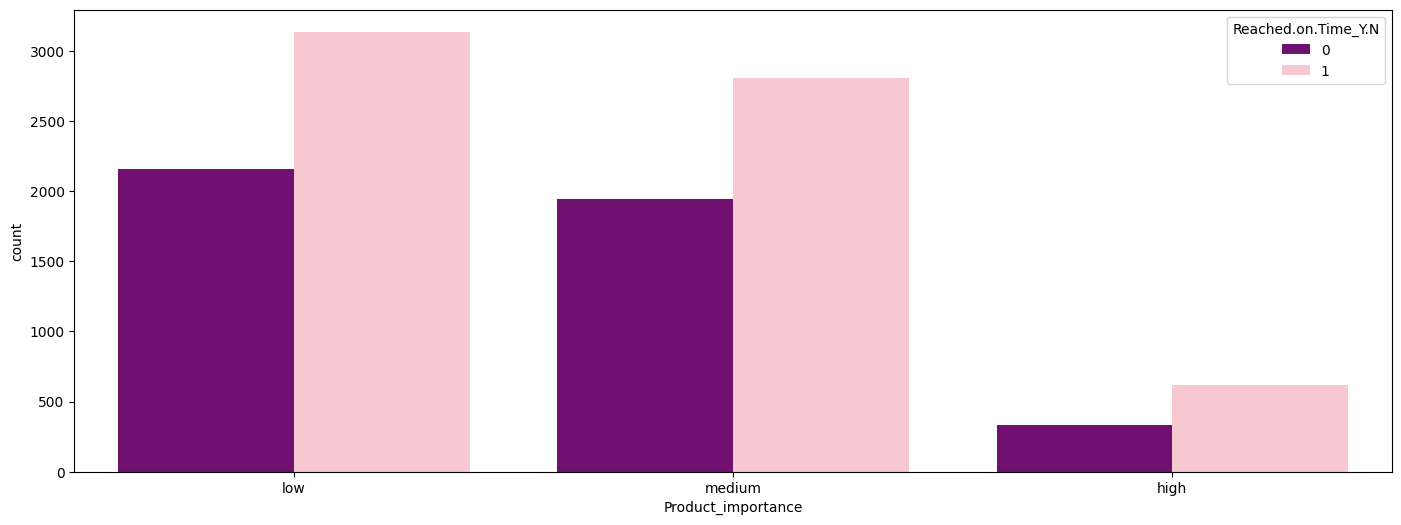

In [ ]:

plt.figure(figsize=(17, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette=['purple', 'pink'])
plt.show()




1.   This visualization represents the distribution of products across different order of importance categories - medium, low, and high - and whether they reached their destination on time or not.
2.   The quantity of products categorized as "high importance" was comparatively lower than those categorized as "medium" and "low".
3.   Products that did not reach their destination on time were more numerous than those that did, across all levels of importance.



In [ ]:
import plotly.express as px
warehouse_counts = df['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()






*   This graph displays the usage of five warehouse blocks for product storage.
*   The F block had a greater quantity of stored products than the other blocks.
*   The remaining blocks have roughly equal quantities of stored products.








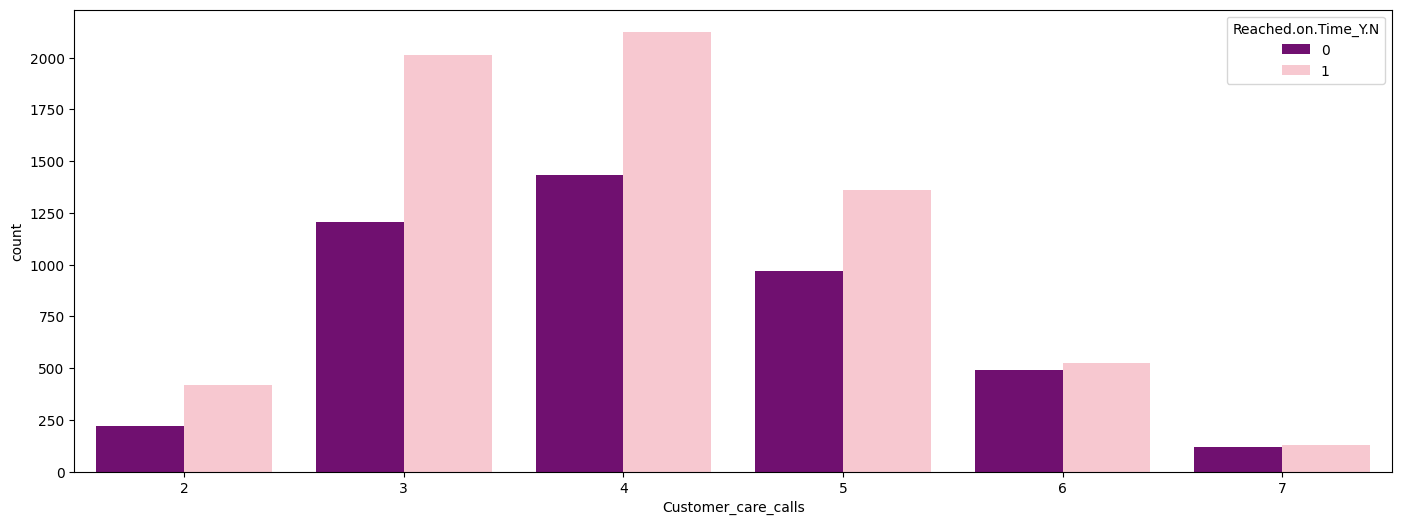

In [ ]:

plt.figure(figsize=(17, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette=['purple', 'pink'])
plt.show()



*   This graph illustrates the correlation between the number of customer care calls and whether or not the deliveries were made on time.
*   For over 2000 products, the maximum number of calls allowed is 4.
*   The majority of shipments necessitate inquiries, and typically, there are between 3 to 5 calls made in regards to them.





# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [ ]:
df = df.drop(['ID', 'Gender'], axis=1 )
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


Bỏ 2 cột ID và Gender.

#OBSERVING AND DEFINING TARGET VARIABLE

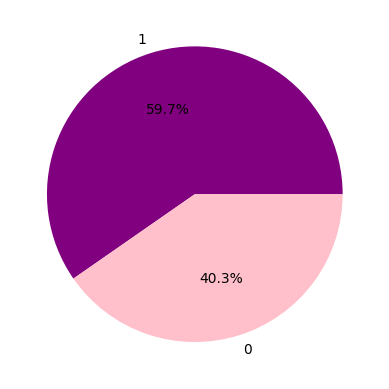

In [ ]:

risk_counts = df['Reached.on.Time_Y.N'].value_counts()
colors = ['Purple', 'Pink']
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('')
plt.show()


In [ ]:
X = df.drop(['Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

In [ ]:
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,44,1233
1,4,0,4,5,216,2,1,59,3088
2,0,0,2,2,183,4,1,48,3374
3,1,0,3,3,176,4,2,10,1177
4,2,0,2,2,184,3,2,46,2484
...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,1,1538
10995,1,2,4,1,232,5,2,6,1247
10996,2,2,5,4,242,5,1,4,1155
10997,4,2,5,2,223,6,2,2,1210


#SCALING THE FEATURES USING STANDARD SCALER




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled)

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0             0.447189         -2.004158            -0.047711   
1             1.118034         -2.004158            -0.047711   
2            -1.565345         -2.004158            -1.799887   
3            -0.894500         -2.004158            -0.923799   
4            -0.223656         -2.004158            -1.799887   
...                ...               ...                  ...   
10994        -1.565345          0.638342            -0.047711   
10995        -0.894500          0.638342            -0.047711   
10996        -0.223656          0.638342             0.828377   
10997         1.118034          0.638342             0.828377   
10998         0.447189          0.638342            -1.799887   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.700755            -0.690722        -0.372735   
1             1.421578             0.120746        -1.029424   
2            -0.700755     

In [ ]:
X = X_scaled
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,0.447189,-2.004158,-0.047711,-0.700755,-0.690722,-0.372735,-0.548034,1.889983,-1.468240
1,1.118034,-2.004158,-0.047711,1.421578,0.120746,-1.029424,-0.548034,2.815636,-0.333893
2,-1.565345,-2.004158,-1.799887,-0.700755,-0.565881,0.283954,-0.548034,2.136824,-0.159002
3,-0.894500,-2.004158,-0.923799,0.006689,-0.711529,0.283954,1.035735,-0.208162,-1.502484
4,-0.223656,-2.004158,-1.799887,-0.700755,-0.545074,-0.372735,1.035735,2.013404,-0.703244


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

#BALANCING TARGET VARIABLE USING CLASS WEIGHTS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 1.2424456368257555, 1: 0.8367249904906808}


#BUILD PREDICTIVE MODELS


**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.634090909090909

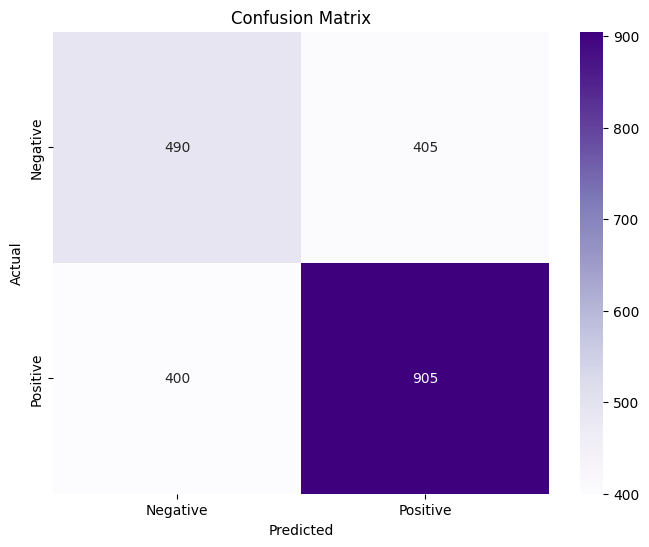

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Vẽ ma trận nhầm lẫn sử dụng heatmap với màu hồng tùy chỉnh
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logis.predict(X_test
)))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       895
           1       0.69      0.69      0.69      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



Nhận xét tổng quan: Mô hình có độ chính xác tổng thể là 63%. Precision và recall của lớp 1 (positive class) cao hơn so với lớp 0 (negative class), ngụ ý rằng mô hình có khả năng dự đoán lớp 1 tốt hơn. Tuy nhiên, cả hai lớp vẫn có độ chính xác và độ phủ chưa cao, và mô hình cần được điều chỉnh để cải thiện hiệu suất.

**TINH CHỈNH MÔ HÌNH**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Tạo mô hình Logistic Regression
logistic = LogisticRegression()

# Tạo danh sách các giá trị hyperparameters để kiểm tra
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Sử dụng Grid Search Cross-Validation để tìm giá trị tối ưu cho các hyperparameters
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy giá trị tối ưu của các hyperparameters
best_params = grid_search.best_params_

# In ra các hyperparameters tối ưu
print("Các hyperparameters tối ưu:")
print(best_params)

# Tạo mô hình Logistic Regression với các giá trị tối ưu
optimized_logistic = LogisticRegression(**best_params)

# Huấn luyện mô hình với dữ liệu huấn luyện
optimized_logistic.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = optimized_logistic.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác tối ưu: {accuracy}")


Các hyperparameters tối ưu:
{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Độ chính xác tối ưu: 0.6504545454545455


Kiểm tra một tập hợp các parameters trong quá trình tinh chỉnh:


*   'penalty': Đây là loại của regularization (điều chuẩn) được áp dụng trong mô hình Logistic Regression. Có hai tùy chọn phổ biến là 'l1' và 'l2'. 'l1' thể hiện regularization L1 (Lasso), 'l2' thể hiện regularization L2 (Ridge). Chúng có tác dụng kiểm soát overfitting bằng cách giới hạn giá trị của các hệ số trong mô hình.

*   'C': Tham số C là nghịch đảo của mức độ tác động của regularization. Giá trị của C càng cao, điều chuẩn càng yếu và mô hình có thể overfitting. Trong danh sách này, em kiểm tra các giá trị khác nhau của C, từ 0.001 đến 100, để xem giá trị nào hoạt động tốt nhất.

*   'solver': Có hai tùy chọn phổ biến là 'liblinear' và 'saga'. Mỗi thuật toán có ưu điểm và hạn chế của riêng nó và có thể hoạt động tốt hơn cho loại dữ liệu cụ thể. Em kiểm tra cả hai thuật toán để xem thuật toán nào là lựa chọn tốt nhất.
*   'max_iter': Đây là số lần lặp tối đa cho thuật toán tối ưu hóa. Thuật toán sẽ dừng sau khi số lần lặp này được đạt đến. Em kiểm tra một loạt các giá trị khác nhau của max_iter để xem giá trị nào đủ để hội tụ mô hình một cách tốt nhất.




Bằng cách thử các giá trị khác nhau cho các hyperparameters này, ta có cơ hội tìm ra cấu hình tối ưu cho mô hình Logistic Regression để đạt được độ chính xác cao hơn. Grid Search Cross-Validation sẽ tự động kiểm tra tất cả các kết hợp của các giá trị này để tìm ra cấu hình tốt nhất.

Và sau khi kiểm tra thì các parameters tối ưu đó là:
*   penalty: 'l1' (lựa chọn hình stric L1 regularization).
*   C: 1 (giá trị tối ưu cho tham số điều chuẩn C).
*   solver: 'liblinear' (lựa chọn thuật toán solver tối ưu).
*   max_iter: 100 (số lượng lần lặp tối đa).


=> Độ chính xác tối ưu: 65%




**2. GNB (Gaussian Naive Bayes)**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred2=GNB.predict(X_test)

In [ ]:
GNB_score = GNB.score(X_test,y_test)

In [ ]:
GNB_score

0.6559090909090909

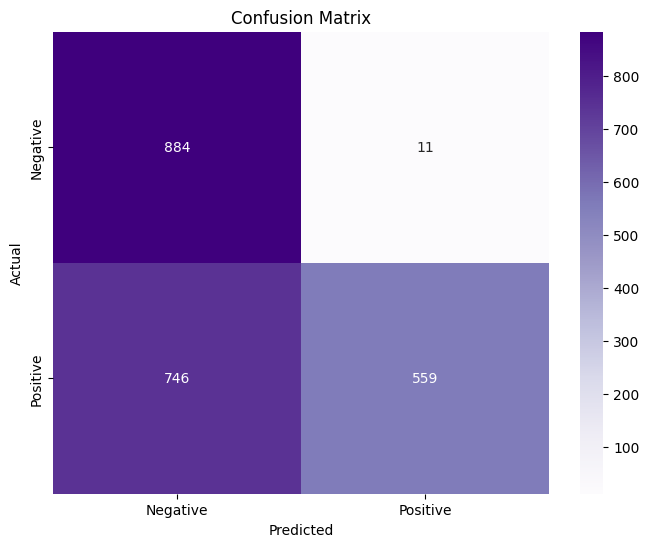

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,GNB.predict(X_test))
)

              precision    recall  f1-score   support

           0       0.54      0.99      0.70       895
           1       0.98      0.43      0.60      1305

    accuracy                           0.66      2200
   macro avg       0.76      0.71      0.65      2200
weighted avg       0.80      0.66      0.64      2200



Mô hình có độ chính xác tổng thể tương đối cao (66%). Tuy nhiên, hiệu suất của mô hình có sự chênh lệch đáng kể giữa các lớp. Mô hình có độ chính xác cao trong việc dự đoán lớp 0, nhưng có khả năng dự đoán lớp 1 với độ chính xác thấp hơn, đặc biệt là trong việc phát hiện các trường hợp thực sự thuộc lớp 1 (recall của lớp 1 thấp). Điều này có thể yêu cầu điều chỉnh mô hình hoặc sử dụng các phương pháp cân bằng mẫu để cải thiện hiệu suất của lớp thiểu số (positive class).

**TINH CHỈNH MÔ HÌNH**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình GNB
gnb = GaussianNB()

# Tạo danh sách các giá trị var_smoothing để kiểm tra
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]}

# Sử dụng Grid Search Cross-Validation để tìm giá trị tối ưu
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy giá trị tối ưu của var_smoothing
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Tạo mô hình GNB với giá trị tối ưu
optimized_gnb = GaussianNB(var_smoothing=best_var_smoothing)

# Huấn luyện mô hình với dữ liệu huấn luyện
optimized_gnb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = optimized_gnb.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác tối ưu: {accuracy}")


Độ chính xác tối ưu: 0.655


Vì GNB không có nhiều parameters để tinh chỉnh, nên xem sử dụng var_smoothing để cải thiện hiệu suất mô hình, làm mịn phân phối xác suất và tránh các vấn đề về phương sai 0.

Tuy đã thử nhiều giá trị var_smoothing khác nhau nhưng độ chính xác không tăng lên. Vậy dừng lại ở độ chính xác 66%.

**3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred3=DT.predict(X_test)

In [ ]:
DT_score = DT.score(X_test,y_test)

In [ ]:
DT_score

0.6418181818181818

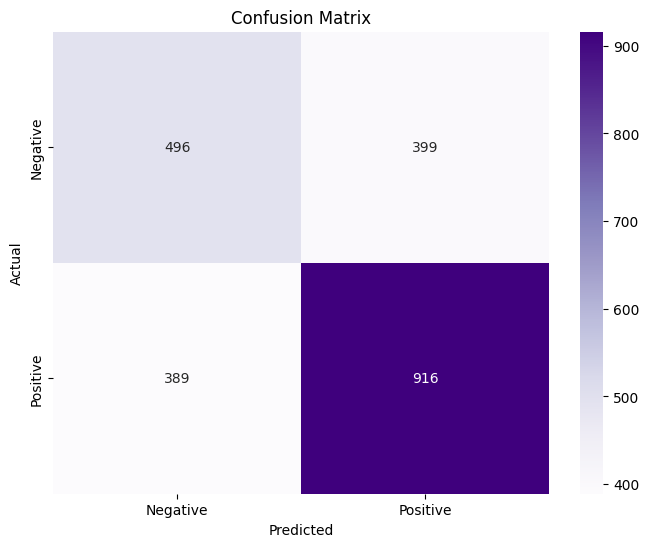

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo mô hình Decision Tree
dt = DecisionTreeClassifier()

# Tạo danh sách các giá trị hyperparameters để kiểm tra
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng Grid Search Cross-Validation để tìm giá trị tối ưu cho các hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy giá trị tối ưu của các hyperparameters
best_params = grid_search.best_params_

# Tạo mô hình Decision Tree với các giá trị tối ưu
optimized_dt = DecisionTreeClassifier(**best_params)

# Huấn luyện mô hình với dữ liệu huấn luyện
optimized_dt.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = optimized_dt.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác tối ưu: {accuracy}")


Độ chính xác tối ưu: 0.6659090909090909


In [ ]:
best_params = grid_search.best_params_
print("Các hyperparameters tối ưu là:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Các hyperparameters tối ưu là:
criterion: entropy
max_depth: 10
min_samples_leaf: 4
min_samples_split: 5


Các hypermeters:

*   criterion: hàm mục tiêu sử dụng để đánh giá chất lượng tách của mỗi nút trong cây quyết định. Hai giá trị phổ biến cho hyperparameter này là "gini" và "entropy".

*  max_depth: độ sâu tối đa của cây quyết định trong mô hình Decision Tree. Nó ảnh hưởng đến khả năng mô hình biểu diễn dữ liệu và ngăn chặn overfitting.

*   min_samples_leaf: Số lượng mẫu tối thiểu cần phải có trong một lá trước khi lá đó được coi là cuối cùng và không thể chia thành các lá con. Nó ảnh hưởng đến việc xác định các lá và có thể kiểm soát kích thước của cây.
*   min_samples_split: Số lượng mẫu tối thiểu cần phải có trong một nút trước khi nút đó có thể được chia thành các nút con trong cây quyết định. Nó ảnh hưởng đến việc cây chia nhánh và có thể kiểm soát sự phức tạp của cây.

=> Độ chính xác tối ưu: 66,6%







#SỬ DỤNG BOOSTING ALGORITHMS

**1.  Gradient Boosting**

Phân loại Gradient Boosting hoạt động bằng cách kết hợp nhiều cây quyết định để tạo ra một mô hình dự đoán mạnh mẽ. Trong mỗi vòng lặp, thuật toán tạo ra một cây quyết định dựa trên các lỗi được tạo ra bởi cây trước đó. Các lỗi được tính toán bằng cách sử dụng một hàm mất mát, đo lường sự khác biệt giữa các giá trị dự đoán và giá trị thực tế.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class_weights = class_weight.compute_sample_weight('balanced', y_train)

In [ ]:
gbc_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)


In [ ]:
gbc_model.fit(X_train, y_train, sample_weight=class_weights)


y_train_pred_gbc = gbc_model.predict(X_train)
y_test_pred_gbc = gbc_model.predict(X_test)

In [ ]:
# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(y_train, y_train_pred_gbc)
test_acc = accuracy_score(y_test, y_test_pred_gbc)

# Print the accuracy scores
print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)

Train accuracy:  0.6879190817138311
Test accuracy:  0.6918181818181818


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       895
           1       0.96      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.77      0.74      0.69      2200
weighted avg       0.80      0.69      0.68      2200



Độ chính xác: 69,2%

#COMPARE MODELS

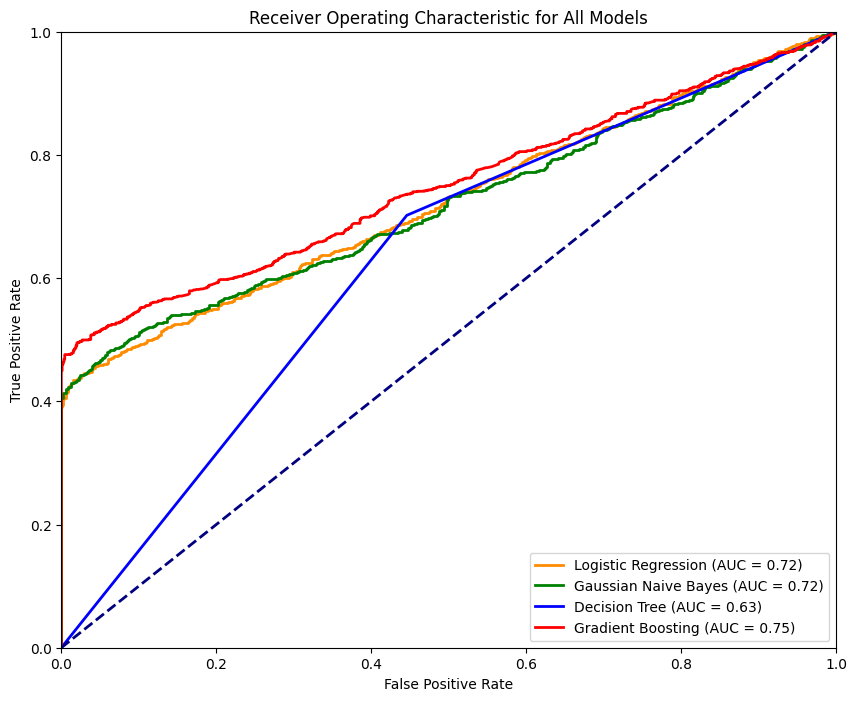

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dự đoán xác suất dương cho tất cả các mô hình
y_pred_prob_logis = logis.predict_proba(X_test)[:, 1]
y_pred_prob_gnb = GNB.predict_proba(X_test)[:, 1]
y_pred_prob_dt = DT.predict_proba(X_test)[:, 1]
y_pred_prob_gbc = gbc_model.predict_proba(X_test)[:, 1]

# Tính ROC curve và AUC cho từng mô hình
fpr_logis, tpr_logis, _ = roc_curve(y_test, y_pred_prob_logis)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_prob_gnb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_prob_gbc)

roc_auc_logis = auc(fpr_logis, tpr_logis)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Vẽ ROC curve cho tất cả các mô hình
plt.figure(figsize=(10, 8))
plt.plot(fpr_logis, tpr_logis, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logis)
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_gbc, tpr_gbc, color='red', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gbc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for All Models')
plt.legend(loc='lower right')
plt.show()





*   Mô hình Logistic Regression và Mô hình GNB có giá trị AUC bằng nhau (0.72), cho thấy cả hai mô hình có hiệu suất phân loại tương tự nhau.

*  Mô hình Gradient Boosting có giá trị AUC cao nhất (0.75), ngụ ý rằng nó có khả năng phân biệt giữa các lớp tốt hơn so với các mô hình khác.

*   Mô hình Decision Tree có giá trị AUC thấp nhất (0.64), cho thấy mô hình này có hiệu suất phân loại kém hơn so với các mô hình khác.



